In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import sklearn as sk
import pandas as pd

In [2]:
mpl.rc('font', family='Nanumgothic')
mpl.rc('axes',unicode_minus=False)

In [40]:
import warnings
warnings.filterwarnings('ignore')

## 다수결 방법

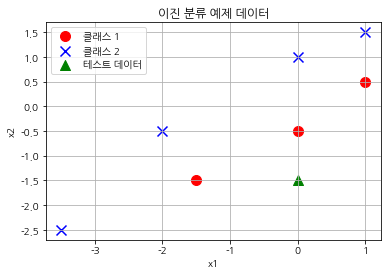

In [8]:
X = np.array([[0, -0.5], [-1.5, -1.5], [1, 0.5], [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])
x_new = [0, -1.5]

plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, marker='o', c='r', label="클래스 1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, marker='x', c='b', label="클래스 2")
plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g', label="테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("이진 분류 예제 데이터")
plt.legend()
plt.grid(True)
plt.show()

1. 로지스틱 회귀모형
2. QDA 모형
3. 가우시안 나이브베이즈 모형

- 마지막으로 세가지 모형을 다수결로 합친 모형을 VotingClassifier 클래스로 만들기 가중치가 각각 (1, 1, 2)

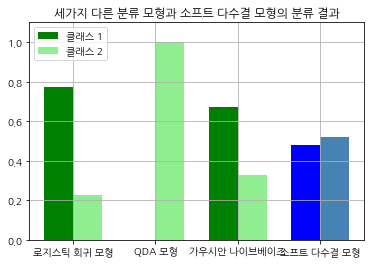

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='soft')

probas = [c.fit(X, y).predict_proba([x_new]) for c in (model1, model2, model3, ensemble)]
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

ind = np.arange(4)
width = 0.35  # bar width
p1 = plt.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color='green')
p2 = plt.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen')
p3 = plt.bar(ind, [0, 0, 0, class1_1[-1]], width, color='blue')
p4 = plt.bar(ind + width, [0, 0, 0, class2_1[-1]], width, color='steelblue')

plt.xticks(ind + 0.5 * width, ['로지스틱 회귀 모형', 'QDA 모형', '가우시안 나이브베이즈', '소프트 다수결 모형'])
plt.ylim([0, 1.1])
plt.title('세가지 다른 분류 모형과 소프트 다수결 모형의 분류 결과')
plt.legend([p1[0], p2[0]], ['클래스 1', '클래스 2'], loc='upper left')
plt.grid(True)
plt.show()


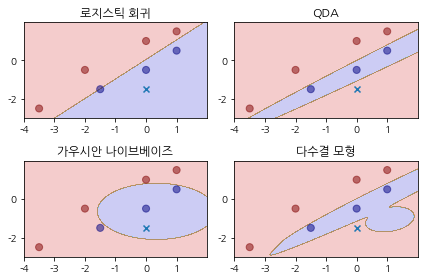

In [15]:
from itertools import product

x_min, x_max = -4, 2
y_min, y_max = -3, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                     np.arange(y_min, y_max, 0.005))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, ensemble],
                        ['로지스틱 회귀', 'QDA', '가우시안 나이브베이즈', '다수결 모형']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(
        X[:, 0], X[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x_new[0], x_new[1], marker='x')
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()
plt.show()

## 모형 결합을 사용한 성능 향상

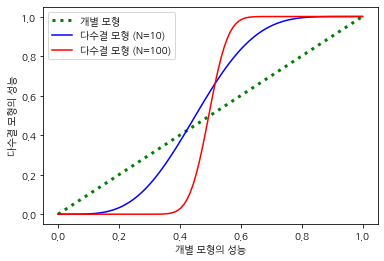

In [18]:
from scipy.special import comb  #combination 조합

def total_error(p, N):
    te = 0.0
    for k in range(int(np.ceil(N/2)), N + 1):
        te += comb(N, k)* p**k * (1-p)**(N-k)
    return te

x= np.linspace(0, 1, 100)
plt.plot(x, x, 'g:', lw=3, label='개별 모형')
plt.plot(x, total_error(x, 10), 'b-', label='다수결 모형 (N=10)')
plt.plot(x, total_error(x, 100), 'r-', label='다수결 모형 (N=100)')
plt.xlabel("개별 모형의 성능")
plt.ylabel("다수결 모형의 성능")
plt.legend(loc=0) # loc 범례 위치
plt.show()

## 배깅

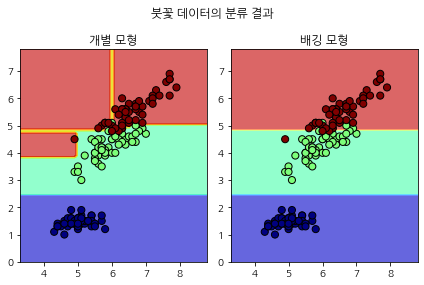

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")

plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

## 연습 문제 2
1. breast cancer 분류 문제를 Bagging을 사용하여 풀어라. 모형의 종류 및 개수나 Bagging 방법은 마음대로 한다. K=5인 교차 검증을 하였을 때 성능의 평균과 표준편차를 구하라.

2. bagging 모형의 성능을 개별 모형과 비교하라.

In [22]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
x2 = bc.data
y2 = bc.target

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100).fit(x2, y2)

from sklearn.model_selection import cross_val_score

cross_val_score(model2, x2, y2, scoring='accuracy', cv=5).mean()

0.9262226362366093

In [24]:
cross_val_score(DecisionTreeClassifier(max_depth=1), x2, y2, scoring="accuracy", cv=5).mean()

0.8998447446048751

## 랜덤포레스트

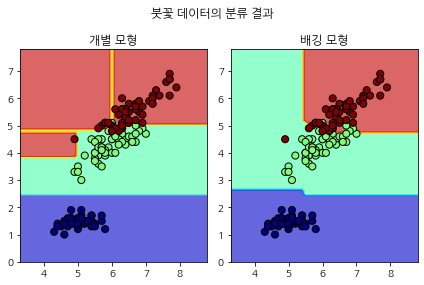

In [33]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data[:, [0, 2]]
y =  iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")

plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

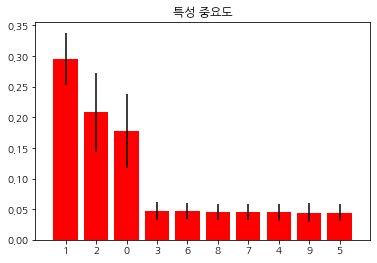

In [35]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.title('특성 중요도')
plt.bar(range(X.shape[1]), importances[indices],
             color='r', yerr=std[indices], align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

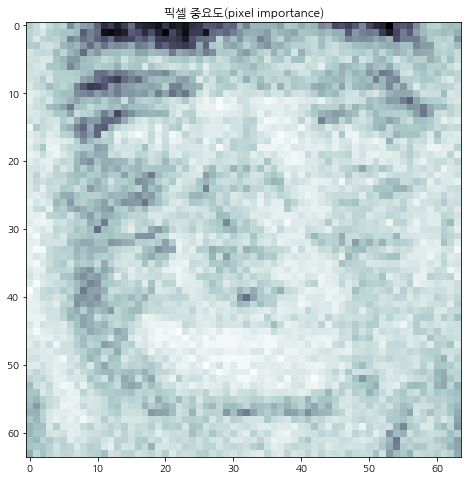

In [36]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

data = fetch_olivetti_faces()
X = data.data
y = data.target

forest = ExtraTreesClassifier(n_estimators=1000, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

plt.figure(figsize=(8,8))
plt.imshow(importances, cmap=plt.cm.bone_r)
plt.title('픽셀 중요도(pixel importance)')
plt.show()

## 연습문제 2

1. breast cancer 분류 문제를 Extreme 랜덤포레스트를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.

2. 특징 중요도를 구하라. 어떤 특징들이 판별에 중요하게 사용되는가?

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

In [41]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

model1 = LogisticRegression()
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model = VotingClassifier(
    estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
    voting='soft', weights=[1, 1.5, 1])

cv = KFold(5, shuffle=True, random_state=0)
accuracy = cross_val_score(model, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

(0.9701443875174661, 0.018875225344533977)

In [42]:
from sklearn.ensemble import BaggingClassifier

model1 = DecisionTreeClassifier(max_depth=5)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
accuracy1 = cross_val_score(model1, X, y, scoring="accuracy", cv=cv)
accuracy2 = cross_val_score(model2, X, y, scoring="accuracy", cv=cv)
accuracy1.mean(), accuracy1.std(), accuracy2.mean(), accuracy2.std()

(0.9350256171401956,
 0.01879744718493049,
 0.95960254618848,
 0.011844124657838963)

In [43]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=500, random_state=0).fit(X, y)
accuracy = cross_val_score(forest, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

(0.9701754385964911, 0.020459480332790547)

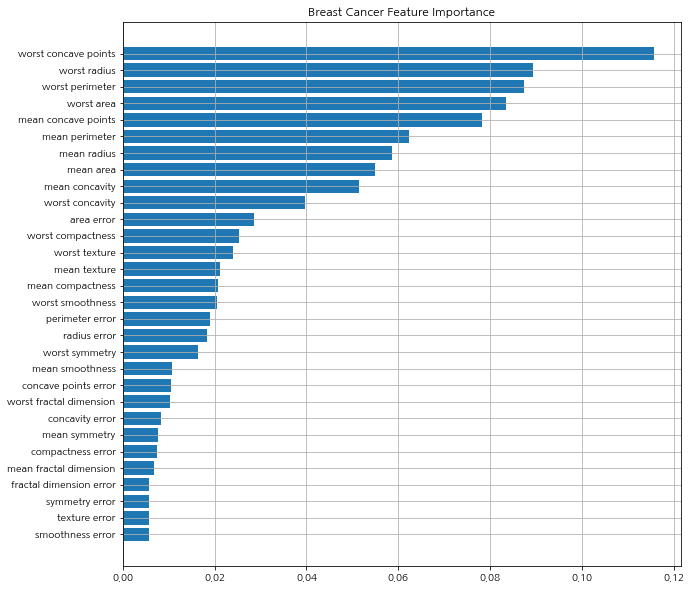

In [45]:
idx = np.argsort(forest.feature_importances_)
names = cancer.feature_names[idx]
values = forest.feature_importances_[idx]

plt.figure(figsize=(10, 10))
plt.barh(names, values)
plt.title("Breast Cancer Feature Importance")
plt.grid(True)
plt.show()